In [1]:
## MEDICAL INSURANCE COST PREDICTION

In [2]:
# Loading Dependancies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
## Loading Data
df_insurance=pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
## Checking Gender
df_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [5]:
## Checking region
df_insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [6]:
## Checking smoker
df_insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
## Encoding the columns
# 1. sex
df_insurance.replace({'sex':{'male':0,'female':1}},inplace=True)

In [10]:
# 2. region
# southeast    364
# northwest    325
# southwest    325
# northeast    324
df_insurance.replace({'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}},inplace=True)

In [14]:
# 3. smoker
df_insurance.replace({'smoker':{'no':0,'yes':1}},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


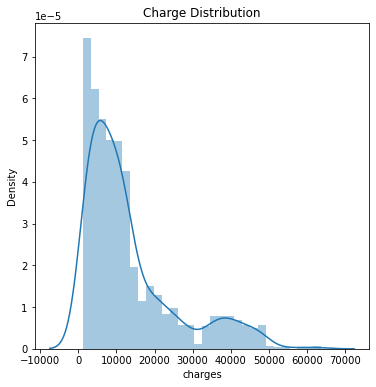

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(df_insurance['charges'])
plt.title('Charge Distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


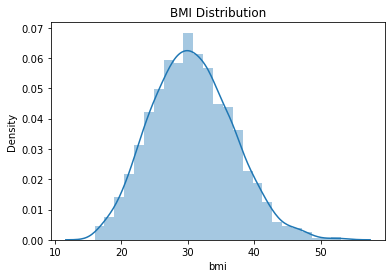

In [20]:
## BMI Distribution
sns.distplot(df_insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

In [21]:
## Data 
X=df_insurance.drop('charges',axis=1)
Y=df_insurance['charges']

In [22]:
## Splitting
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)

In [23]:
print('Training :',x_train.shape,' Testing :',x_test.shape)

Training : (1003, 6)  Testing : (335, 6)


In [24]:
## Model Peparations
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
## Training Accuracy
train_pred=model.predict(x_train)

In [27]:
print('accuracy :',metrics.r2_score(y_train,train_pred))

accuracy : 0.7497417083204653


In [28]:
## Testing Accuracy
test_pred=model.predict(x_test)
print('Test Accuracy :',metrics.r2_score(y_test,test_pred))

Test Accuracy : 0.751056474414727


In [29]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27732.64644485]
The insurance cost is USD  27732.646444845745


C:\Users\intel\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print('The insurance cost is USD ', prediction)

The insurance cost is USD  [27732.64644485]


In [34]:
input_data_as_numpy_array.shape

(6,)